# Q.1)
1.Write a Python program to solve the linear regression problem batch
gradient descent.
a. Implement batch gradient descent from scratch in Python, without
input data normalization. Experiment with various learning rates.
State your observations.
b. Implement batch gradient from scratch in Python, with input data
normalization. Experiment with various learning rates to determine
optimal learning rate. State your observations in this case.
c. Repeat a & b using Pytorch’s implementation of gradient descent
and compare your results

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
import torch
import torch.nn as nn

In [30]:
#importing data
df = pd.read_excel("E:\ID5030\HW03\Concrete_Data.xls")
print('The shape of given data is:',df.shape)
df

The shape of given data is: (1030, 9)


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [31]:
#obtaining target values
Y = df.iloc[:,8]
Y.head()

0    79.986111
1    61.887366
2    40.269535
3    41.052780
4    44.296075
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

In [32]:
#obtaining feature values
X=df.iloc[:,:8]
print(f'Number of features in the given dataset is {X.shape[1]}')
X

Number of features in the given dataset is 8


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [33]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size = 0.30,random_state=1)
print(f'The shape of training data is:{x_train.shape}')
#print(y_train.shape)
print(f'The shape of test data is:{x_test.shape}')
#print(y_test.shape)
x_train=np.array(x_train)
y_train = np.array(y_train)
y_train[0]
x_test=np.array(x_test)
y_test = np.array(y_test)

The shape of training data is:(721, 8)
The shape of test data is:(309, 8)


In [34]:
#NORMALISATION OF DATA
def normalise_features(x):
    mu = np.mean(x,axis=0)
    sd = np.std(x,axis=0)
    x_norm=(x-mu)/sd
    return(x_norm,mu,sd)

In [35]:
#Train data normalisation
x_train_norm,meantrain_norm,sdtrain_norm=normalise_features(x_train)
#Test data normalisation
x_test_norm = (x_test-meantrain_norm)/sdtrain_norm

In [36]:
#Finding cost value
def cost_function(x,y,w,b):
    cost = 0.0
    m = x.shape[0]
    for i in range(m):
        ypred=np.dot(x[i],w) + b
        cost  = cost + (y[i]-ypred)**2
    cost = cost/(2*m)
    return cost

In [37]:
#calculating gradient values
def gradient(x,y,w,b):
    m,n = x.shape
    dj_dwj = np.zeros(n)
    dj_dbj = 0
    for j in range(n):
        for i in range(m):
            err = (np.dot(x[i],w)+b)-y[i]
            dj_dwj[j] = dj_dwj[j] + err*x[i,j]
            dj_dbj = dj_dbj + err
    dj_dwj = dj_dwj/m
    dj_dbj = dj_dbj/m
    return dj_dwj,dj_dbj
   

In [38]:
def gradient_descent(x,y,w_in,b_in,gradient_function,alpha,num_iters,cost_function):
    J=[]
    w = w_in
    b = b_in
    for i in range(num_iters):
        dj_dw,dj_db = gradient(x,y,w,b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        J.append(cost_function(x,y,w,b))
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: mean squared error {2*J[-1]:8.2f}   ")
      
    return w,b,J


Learningrate=1e-08
Iteration    0: mean squared error  1508.82   
Iteration 1000: mean squared error   275.41   
Iteration 2000: mean squared error   258.38   
Iteration 3000: mean squared error   244.23   
Iteration 4000: mean squared error   232.36   
Iteration 5000: mean squared error   222.32   
Iteration 6000: mean squared error   213.76   
Iteration 7000: mean squared error   206.40   
Iteration 8000: mean squared error   200.00   
Iteration 9000: mean squared error   194.40   
Feature weights after training:[ 0.0624777   0.02808047  0.00472539 -0.00326694  0.00391882  0.00659701
  0.01101829  0.02847132]
The bias term after training: 0.00027637990590216783
Mean square error of test data is: 175.54407252524726
Learningrate=1e-07
Iteration    0: mean squared error  1164.76   
Iteration 1000: mean squared error   189.40   
Iteration 2000: mean squared error   159.33   
Iteration 3000: mean squared error   143.97   
Iteration 4000: mean squared error   134.33   
Iteration 5000: mean

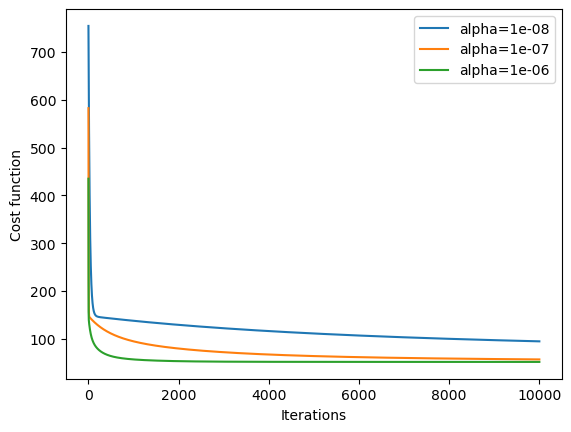

In [35]:
#Train data without normalisation
alpha=0.00000001
w_initial=np.zeros(x_train.shape[1])
b_initial=0
cost_test_full=[]
while alpha <=0.000001:
    iterations=10000
    print(f'Learningrate={alpha}')
    w_final,b_final,J_final = gradient_descent(x_train,y_train,w_initial,b_initial,gradient,alpha,iterations,cost_function)
    print(f'Feature weights after training:{w_final}')
    print(f'The bias term after training: {b_final}')
    cost_test = cost_function(x_test,y_test,w_final,b_final)
    cost_test_full.append(cost_test)
    mse_test=cost_test*2
    print(f'Mean square error of test data is: {mse_test}')
    plt.plot(J_final,label=f'alpha={alpha}')
    plt.legend()
    alpha=alpha*10
plt.xlabel('Iterations')
plt.ylabel('Cost function')
plt.show()

In [36]:
#Test data without normalisation
alpha=0.00000001
for i in cost_test_full:
    print(f'alpha:{alpha}  Mean square error for test data:{2*i}')
    alpha=alpha*10

alpha:1e-08  Mean square error for test data:175.54407252524726
alpha:1e-07  Mean square error for test data:129.94500233042186
alpha:1e-06  Mean square error for test data:119.94879132927437


Learningrate=1e-05
Iteration    0: mean squared error  1550.38   
Iteration  500: mean squared error  1451.18   
Iteration 1000: mean squared error  1359.48   
Iteration 1500: mean squared error  1274.70   
Iteration 2000: mean squared error  1196.32   
Iteration 2500: mean squared error  1123.85   
Iteration 3000: mean squared error  1056.82   
Iteration 3500: mean squared error   994.83   
Iteration 4000: mean squared error   937.48   
Iteration 4500: mean squared error   884.43   
Mean square error of test data is: 850.5719252266581
Feature weights after training:[ 0.40939026  0.13084146 -0.07607691 -0.24661266  0.31595201 -0.17236316
 -0.12514099  0.2624858 ]
The bias term after training: 11.725266813507048
Learningrate=0.0001
Iteration    0: mean squared error  1548.52   
Iteration  500: mean squared error   834.33   
Iteration 1000: mean squared error   505.38   
Iteration 1500: mean squared error   350.39   
Iteration 2000: mean squared error   274.35   
Iteration 2500: mean squ

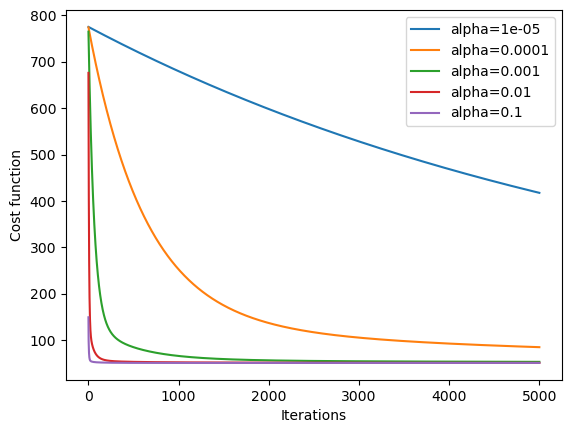

In [40]:
#Train data normalised
alphanorm=0.00001
w_initial=np.zeros(x_train.shape[1])
b_initial=0
cost_norm_test_full=[]
while alphanorm <=0.1:
    iterationsnorm=5000
    print(f'Learningrate={alphanorm}')
    wnorm_final,bnorm_final,Jnorm_final = gradient_descent(x_train_norm,y_train,w_initial,b_initial,gradient,alphanorm,
                                                           iterationsnorm,cost_function)
    costnorm_test = cost_function(x_test_norm,y_test,wnorm_final,bnorm_final)
    msenorm_test=costnorm_test*2
    cost_norm_test_full.append(costnorm_test)
    print(f'Mean square error of test data is: {msenorm_test}')
    print(f'Feature weights after training:{wnorm_final}')
    print(f'The bias term after training: {bnorm_final}')
    plt.plot(Jnorm_final,label=f'alpha={alphanorm}')
    plt.legend()
    alphanorm=alphanorm*10
plt.xlabel('Iterations')
plt.ylabel('Cost function')
plt.show()

In [41]:
#Test data normalised
alphanorm=0.00001
for i in cost_norm_test_full:
    print(f'alpha:{alphanorm}  Mean square error for test data:{2*i}')
    alphanorm=alphanorm*10

alpha:1e-05  Mean square error for test data:850.5719252266581
alpha:0.0001  Mean square error for test data:162.94726585218424
alpha:0.001  Mean square error for test data:125.0072385804124
alpha:0.01  Mean square error for test data:120.49879995365357
alpha:0.1  Mean square error for test data:120.19296195337515


In [8]:
#Creating tensors
m,n=x_train_norm.shape
X_train_norm = torch.from_numpy(x_train_norm.astype(np.float32))
X_train = torch.from_numpy(x_train.astype(np.float32))
Y_train = torch.from_numpy(y_train.astype(np.float32))
X_test_norm = torch.from_numpy(x_test_norm.astype(np.float32))
X_test = torch.from_numpy(x_test.astype(np.float32))
Y_test = torch.from_numpy(y_test.astype(np.float32))
Y_train = Y_train.view(m,1)
Y_test = Y_test.view(Y_test.shape[0],1)
print(Y_train.shape)
print(X_train_norm.shape)
print(Y_test.shape)
print(X_test_norm.shape)
print(X_train.shape)
print(X_test.shape)

torch.Size([721, 1])
torch.Size([721, 8])
torch.Size([309, 1])
torch.Size([309, 8])
torch.Size([721, 8])
torch.Size([309, 8])


Learningrate=4e-09
epochs    0: mean squared error 59652.09   
epochs 2000: mean squared error  1651.17   
epochs 4000: mean squared error  1249.19   
epochs 6000: mean squared error   965.85   
epochs 8000: mean squared error   764.45   
epochs 10000: mean squared error   619.97   
epochs 12000: mean squared error   515.25   
epochs 14000: mean squared error   438.51   
epochs 16000: mean squared error   381.59   
epochs 18000: mean squared error   338.83   
Mean square error of test data is: 285.6078796386719
Feature weights after training:[ 0.09195881 -0.0316364  -0.00933324  0.1338343   0.03872159  0.02748013
 -0.0536963   0.0701519 ]
The bias term after training: -0.24421273171901703
Learningrate=4e-08
epochs    0: mean squared error   306.27   
epochs 2000: mean squared error   190.79   
epochs 4000: mean squared error   162.90   
epochs 6000: mean squared error   148.42   
epochs 8000: mean squared error   138.85   
epochs 10000: mean squared error   131.90   
epochs 12000: mean

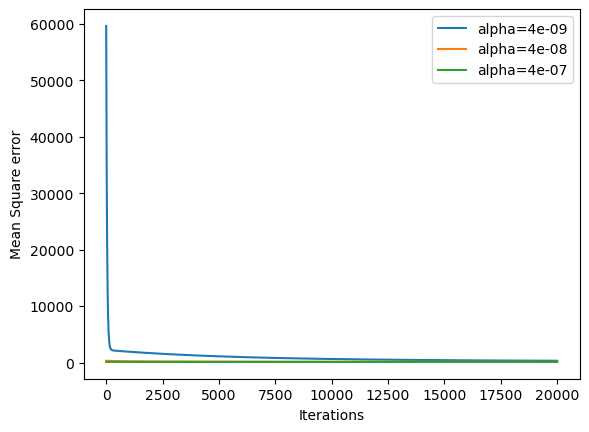

In [24]:
#batch gradient descent for Train data without normalisation using pytorch
m,n=X_train_norm.shape
alpha=0.000000004
Loss_test_full=[]
iterations=20000
input_size=n
output_size=1
model1=nn.Linear(input_size,output_size)
while alpha <=0.0000004:
    optimizer1 = torch.optim.SGD(model1.parameters(),lr=alpha)
    print(f'Learningrate={alpha}')
    J1=[]
    for i in range(iterations): 
        Y_train_predicted1 = model1(X_train)
        loss_train = mse1(Y_train,Y_train_predicted1)
        loss_train.backward()
        optimizer1.step()
        optimizer1.zero_grad()
        J1.append(loss_train.item())
        if i% math.ceil(iterations / 10) == 0:
            print(f"epochs {i:4d}: mean squared error {J1[-1]:8.2f}   ")
    Y_test_predicted1 = model1(X_test)
    loss_test = mse1(Y_test,Y_test_predicted1)
    Loss_test_full.append(loss_test)
    w_final,b_final=model1.parameters()
    w_final=w_final.detach().numpy().squeeze()
    b_final=b_final.detach().numpy().squeeze()
    print(f'Mean square error of test data is: {loss_test}')
    print(f'Feature weights after training:{w_final}')
    print(f'The bias term after training: {b_final}')
    plt.plot(J1,label=f'alpha={alpha}')
    plt.legend()
    alpha=alpha*10
plt.xlabel('Iterations')
plt.ylabel('Mean Square error')
plt.show()


In [25]:
#Test data normalised
alpha=0.000000004
for i in Loss_test_full:
    print(f'alpha:{alpha}  Mean square error for test data:{i}')
    alpha=alpha*10

alpha:4e-09  Mean square error for test data:285.6078796386719
alpha:4e-08  Mean square error for test data:132.83709716796875
alpha:4e-07  Mean square error for test data:119.87944030761719


Learningrate=1e-05
epochs    0: mean squared error  1561.48   
epochs  300: mean squared error  1543.89   
epochs  600: mean squared error  1526.51   
epochs  900: mean squared error  1509.34   
epochs 1200: mean squared error  1492.38   
epochs 1500: mean squared error  1475.64   
epochs 1800: mean squared error  1459.09   
epochs 2100: mean squared error  1442.76   
epochs 2400: mean squared error  1426.62   
epochs 2700: mean squared error  1410.68   
Mean square error of test data is: 1421.660888671875
Feature weights after training:[ 0.34495416  0.2072029  -0.38832372 -0.29671046  0.2659122   0.0228103
 -0.22268347  0.27341416]
The bias term after training: 1.9923948049545288
Learningrate=0.0001
epochs    0: mean squared error  1394.93   
epochs  300: mean squared error  1247.72   
epochs  600: mean squared error  1117.58   
epochs  900: mean squared error  1002.51   
epochs 1200: mean squared error   900.73   
epochs 1500: mean squared error   810.68   
epochs 1800: mean squared 

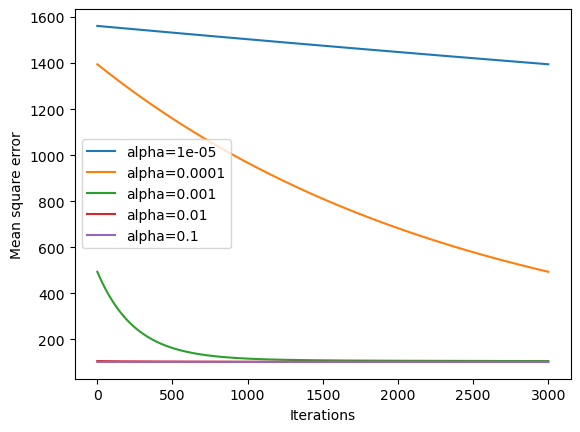

In [26]:
#batch gradient descent for Train data with normalisation using Pytorch
alphanorm=0.00001
Loss_norm_test_full=[]
iterationsnorm=3000
input_size=n
output_size=1
model=nn.Linear(input_size,output_size)
mse=nn.MSELoss()
model=nn.Linear(input_size,output_size)
while alphanorm <=0.1:
    optimizer = torch.optim.SGD(model.parameters(),lr=alphanorm)
    print(f'Learningrate={alphanorm}')
    J=[]
    for i in range(iterationsnorm): 
        Y_train_predicted = model(X_train_norm)
        loss_norm_train = mse(Y_train,Y_train_predicted)
        loss_norm_train.backward()
        optimizer.step()
        optimizer.zero_grad()
        J.append(loss_norm_train.item())
        if i% math.ceil(iterationsnorm / 10) == 0:
            print(f"epochs {i:4d}: mean squared error {J[-1]:8.2f}   ")
    Y_test_predicted = model(X_test_norm)
    loss_norm_test = mse(Y_test,Y_test_predicted)
    Loss_norm_test_full.append(loss_norm_test)
    w_norm_final,b_norm_final=model.parameters()
    w_norm_final=w_norm_final.detach().numpy().squeeze()
    b_norm_final=b_norm_final.detach().numpy().squeeze()
    print(f'Mean square error of test data is: {loss_norm_test}')
    print(f'Feature weights after training:{w_norm_final}')
    print(f'The bias term after training: {b_norm_final}')
    plt.plot(J,label=f'alpha={alphanorm}')
    plt.legend()
    alphanorm=alphanorm*10
plt.xlabel('Iterations')
plt.ylabel('Mean square error')
plt.show()



In [22]:
#Test data normalised
alphanorm=0.00001
for i in Loss_norm_test_full:
    print(f'alpha:{alphanorm}  Mean square error for test data:{i}')
    alphanorm=alphanorm*10

alpha:1e-05  Mean square error for test data:1426.0833740234375
alpha:0.0001  Mean square error for test data:490.55712890625
alpha:0.001  Mean square error for test data:124.0216293334961
alpha:0.01  Mean square error for test data:120.33795928955078
alpha:0.1  Mean square error for test data:120.19294738769531


# INFERENCES

a) Batch gradient descent was implemented from scratch forinput data without normalisation.
The results were similar to the ones
that were obtained when implemented using scikit-learn.It was found that as learning rate increases,covergence becomes faster,
reaches an optimum limit,and then starts diverging.
For 10000 iterations,the optimum value was found to be 10^-6.The mean square
error obtained was 103.41 for train data and 119.94 for test data.

b) Batch gradient descent was implemented from scratch for input data without normalisation.
The results were similar to the ones
that were obtained when implemented using scikit-learn.It was found that as learning rate increases,covergence becomes faster,
reaches an optimum limit,and then starts diverging.Also,it was observec that the convergence was occuring in a faster pace
(in lesser number of iterations) compared to the data without normalisation.
For 10000 iterations,the optimum value of learning rate was found to be 0.1.The mean square
error obtained was 102.55 for train data and 120.19 for test data.

c) Both a) and b) was implemented using Pytorch.It was observed that the final results were comparable to the results obtained
in both (a) and (b) even though there were changes in higher values of learning rate. Due to the highly optimized algorithms of
Pytorch, the time required for convergence was very less(almost instantly).

Further,the respective graphs of 'Iterations v/s Mean square error are plotted' for different values of learning rate for detailed analysis.